# Model Fitting
*Which model fits the data best?*

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from libs.handlers import network as nw
from libs.handlers import utils
from libs.handlers import viz
from libs.handlers import io
from libs.handlers import empirical
from libs.handlers import validations as val
from libs.generators import model

In [2]:
DATA = '../data/empirical'
RESULTS = val.validate_path("../data/fit/")
PLOTS = val.validate_path("../plots")

In [3]:
print(f"Data folder: {DATA}")
print(f"Results folder: {RESULTS}")
print(f"Plots folder: {PLOTS}")

Data folder: ../data/empirical
Results folder: ../data/fit/
Plots folder: ../plots


## Toy example

In [4]:
generator_name = 'PAH'
args = dict(name=generator_name, N=1000, m=2, fm=0.1, d=0.01, h_MM=0.0, h_mm=0.1)
G_toy = model.create(args)

In [5]:
utils.evaluate_hyper_params(G_toy, generator_name)

,hyperparam,original,analytics
0,N,1000,1000
1,class,m,None
2,d,0.01,0.01
3,fm,0.1,0.1
4,h_MM,0.0,0.000094
5,h_mm,0.1,0.137889
6,m,2,2
7,name,PAH,PAH
8,seed,None,None


## Model Fitting Example

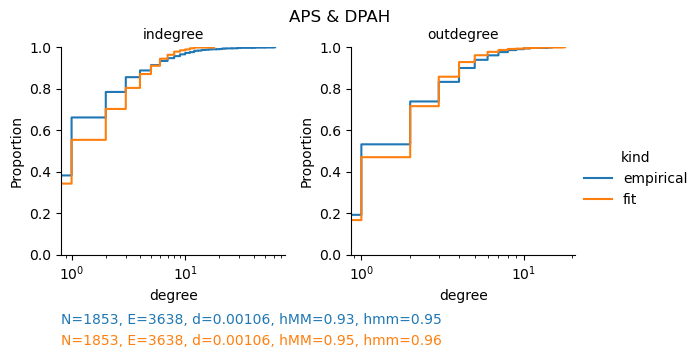

In [6]:
G_a = io.read_gpickle('../data/empirical/aps_attributed_network_anon.gpickle')
args = G_a.graph.copy()
args['name'] = 'DPAH'
Gf_a = model.create(args)
viz.plot_degree_distributions(G_a, Gf_a, ecdf=True)

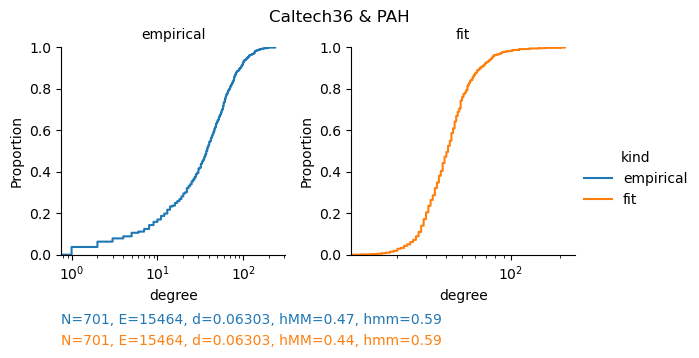

In [7]:
G_c = io.read_gpickle('../data/empirical/Caltech36.gpickle')
args = G_c.graph.copy()
args['name'] = 'PAH'
Gf_c = model.create(args)
viz.plot_degree_distributions(G_c, Gf_c, ecdf=True)

## Model Fitting (all models, all datasets)

Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.


[ERROR] get_homophily_and_triadic_closure | network.py | division by zero


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.


[ERROR] get_homophily_and_triadic_closure | network.py | list indices must be integers or slices, not Symbol


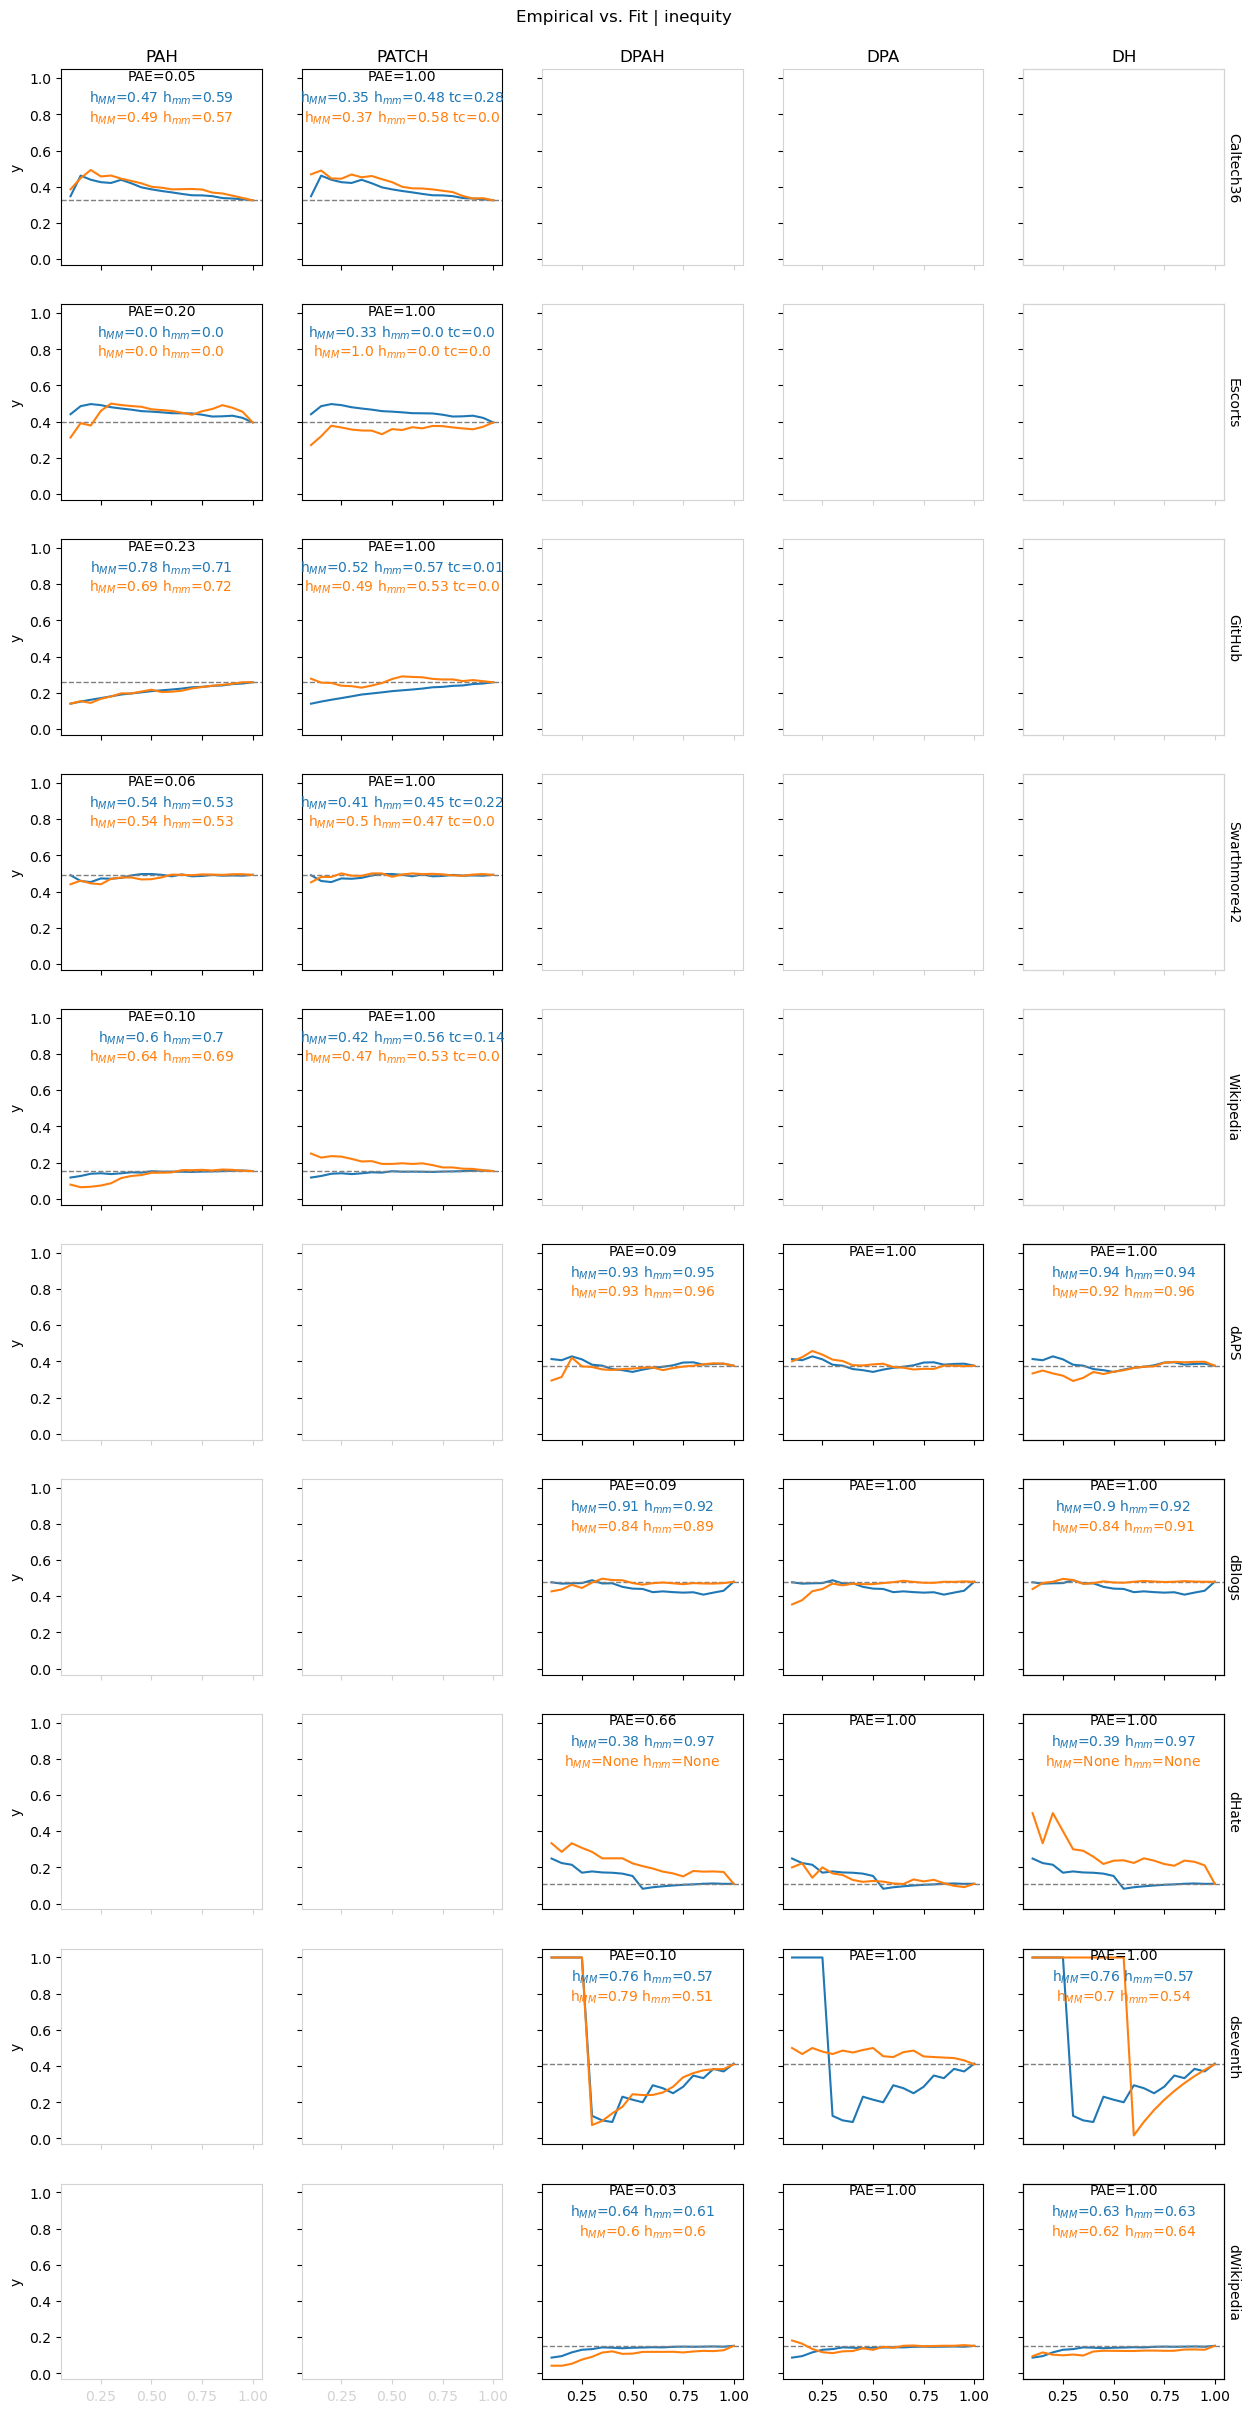

In [11]:
viz.plot_empirical_vs_fit(empirical_path=DATA, fit_path=RESULTS, kind='inequity', metric='pagerank', output=None, verbose=False)